### DECISION TREE CLASSIFICATION

In [209]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree


In [210]:
df=sns.load_dataset('titanic')
x=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [211]:
x

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [212]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [213]:
x.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sex     891 non-null    object 
 2   age     714 non-null    float64
 3   sibsp   891 non-null    int64  
 4   parch   891 non-null    int64  
 5   fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [215]:
x['pclass'].unique()

array([3, 1, 2])

In [216]:
x['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [217]:
x['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

The `sibsp` column in the Titanic dataset represents the number of siblings or spouses aboard the Titanic. The appropriate datatype for this column is `int64`, which is an integer type. This is because the number of siblings or spouses is a whole number.

In [218]:
x.isnull().sum()

pclass      0
sex         0
age       177
sibsp       0
parch       0
fare        0
dtype: int64

In [219]:
y.isnull().sum()

np.int64(0)

In [220]:
#filling missing values
x['age'].fillna(x['age'].mean(),inplace=True)


C:\Users\qasim\AppData\Local\Temp\ipykernel_8780\283383937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(),inplace=True)
C:\Users\qasim\AppData\Local\Temp\ipykernel_8780\283383937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(x['age'].mean(),inplace=True)


In [221]:
x['age'].isnull().sum()

np.int64(0)

<Axes: xlabel='age', ylabel='Count'>

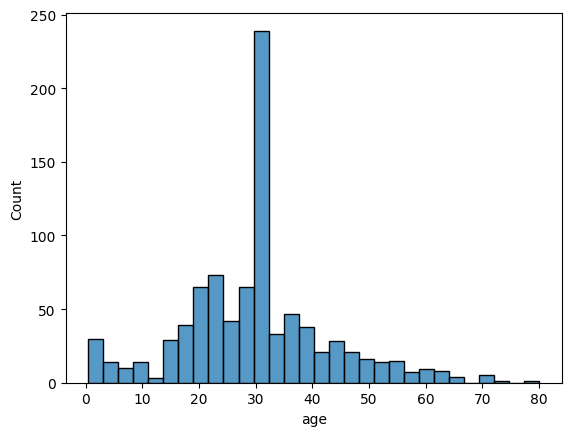

In [222]:
#check normization of age using plot
sns.histplot(x['age'])

In [223]:
x.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [225]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [226]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [227]:

x.head()
x['sex'] = x['sex'].apply(lambda s: 1 if s == 'male' else 0)

C:\Users\qasim\AppData\Local\Temp\ipykernel_8780\2779841696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = x['sex'].apply(lambda s: 1 if s == 'male' else 0)


In [228]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [229]:
x.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [231]:
#apply decision tree classifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [232]:
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.7821229050279329


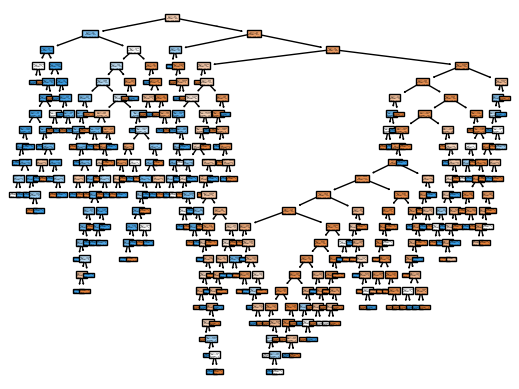

<Figure size 14000x8000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [233]:
tree.plot_tree(model.fit(x,y), filled=True)
plt.figure(figsize=(140,80))
plt.show()
plt.savefig('tree.pdf',format='pdf',dpi=300)

In [234]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision:',precision_score(y_test,y_pred))

Precision: 0.75


In [235]:
print('Recall:',recall_score(y_test,y_pred))

Recall: 0.6521739130434783


In [236]:
print('f1_score:',f1_score(y_test,y_pred))

f1_score: 0.6976744186046512


In [237]:
#apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [238]:
#predict the model
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.8268156424581006


In [239]:
# precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Precision: 0.8166666666666667
Recall: 0.7101449275362319
f1_score: 0.7596899224806202


In [243]:
#draw confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm



array([[99, 11],
       [20, 49]])

<Axes: >

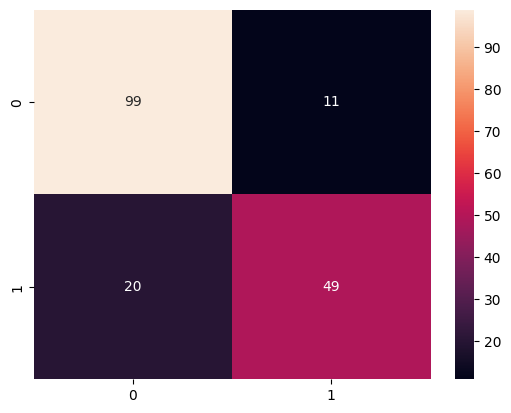

In [244]:
sns.heatmap(cm,annot=True)


### Precision, Recall, and F1 Score

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions. The formula for precision is:
\[ \text{Precision} = \frac{TP}{TP + FP} \]
where \( TP \) is the number of true positives and \( FP \) is the number of false positives.

**Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all the observations in the actual class. It measures the ability of the model to capture all the positive cases. The formula for recall is:
\[ \text{Recall} = \frac{TP}{TP + FN} \]
where \( TP \) is the number of true positives and \( FN \) is the number of false negatives.

**F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The formula for the F1 score is:
\[ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

These metrics are crucial for evaluating the performance of classification models, especially when dealing with imbalanced datasets.
